In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [2]:
df = pd.read_csv('breast_cancer.csv', header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
headers = pd.read_csv('field_names.txt', sep="\n", header = None)


In [5]:
#type(headers)

In [6]:
#headers.head()

In [7]:
titles = headers.values.tolist()

In [8]:
titles

[['ID'],
 ['diagnosis'],
 ['radius_mean'],
 ['radius_sd_error'],
 ['radius_worst'],
 ['texture_mean'],
 ['texture_sd_error'],
 ['texture_worst'],
 ['perimeter_mean'],
 ['perimeter_sd_error'],
 ['perimeter_worst'],
 ['area_mean'],
 ['area_sd_error'],
 ['area_worst'],
 ['smoothness_mean'],
 ['smoothness_sd_error'],
 ['smoothness_worst'],
 ['compactness_mean'],
 ['compactness_sd_error'],
 ['compactness_worst'],
 ['concavity_mean'],
 ['concavity_sd_error'],
 ['concavity_worst'],
 ['concave_points_mean'],
 ['concave_points_sd_error'],
 ['concave_points_worst'],
 ['symmetry_mean'],
 ['symmetry_sd_error'],
 ['symmetry_worst'],
 ['fractal_dimension_mean'],
 ['fractal_dimension_sd_error'],
 ['fractal_dimension_worst']]

In [9]:
len(titles)

32

In [10]:
len(df.columns)

32

In [11]:
titles = str(titles).replace("[","").replace("]","").replace(" ","").replace("'","")

In [12]:
titles

'ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst'

In [13]:
titles = titles.split(',')

In [14]:
titles

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [15]:
df = pd.read_csv('breast_cancer.csv', header=None, names=titles)

In [16]:
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.corr()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
ID,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
radius_sd_error,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
radius_worst,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
texture_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
texture_sd_error,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
texture_worst,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
perimeter_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
perimeter_sd_error,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
perimeter_worst,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


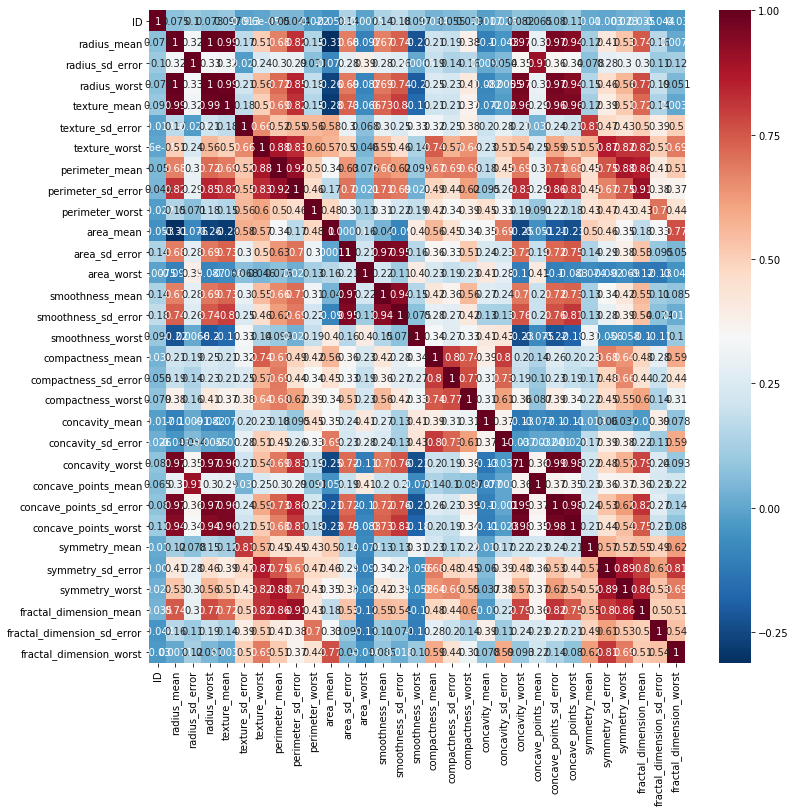

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')

In [19]:
df1 = df.copy()

In [20]:
df1 = df1.drop(columns = 'ID')

In [21]:
df1.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [22]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    

In [23]:
df1 = MultiColumnLabelEncoder(columns = ['diagnosis']).fit_transform(df1)

In [24]:
df1.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df1.diagnosis.unique()

array([1, 0])

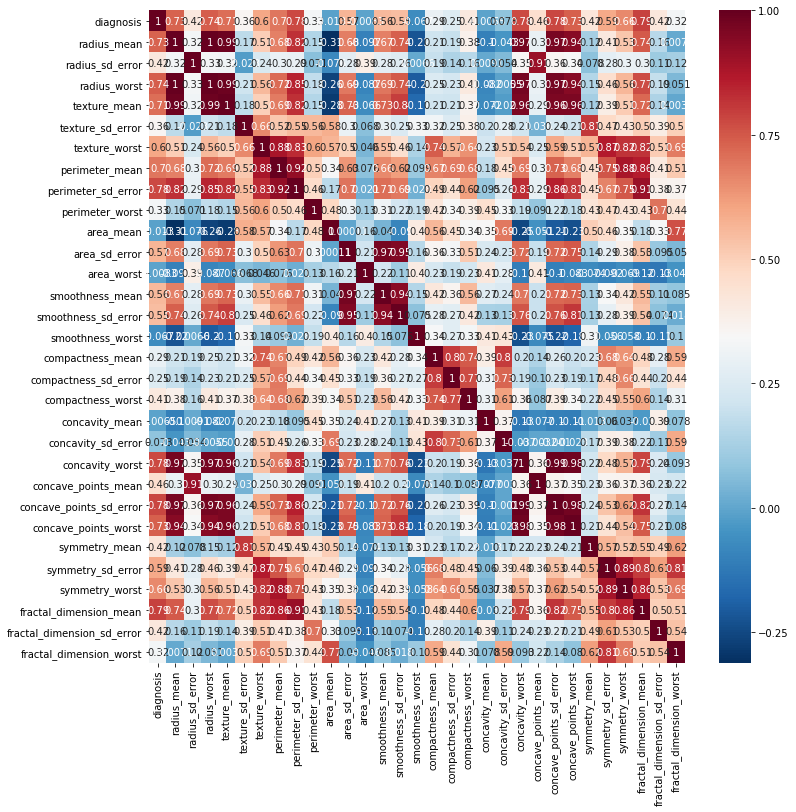

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True,cmap='RdBu_r')

# Applying Naive Bayes Model

In [27]:
X = df1.iloc[:, 1:]

In [28]:
X.head(1)

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [29]:
Y = df1.iloc[:, 0]

In [30]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =0)

In [32]:
sc = StandardScaler()

In [33]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
classifier = GaussianNB()

In [35]:
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
Y_pred = classifier.predict(X_test)

In [37]:
cm = confusion_matrix(Y_test, Y_pred)

In [38]:
cm

array([[64,  3],
       [ 4, 43]])

In [39]:
met.accuracy_score(Y_test, Y_pred)

0.9385964912280702